<a href="https://colab.research.google.com/github/yusrialsanaani/Predicting-Medical-Appointment-Status/blob/main/A1_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>IAI5101: Foundations of Machine Learning for Engineers & Scientists</center>

## <center>Assignment 1</center>
### <center>Done By</center>
### <center>Yusri Al-Sanaani</center>
### <center>ID: 300216450</center>

# Importing the required libraries

In [1]:
import numpy as np 
import pandas as pd 
# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Normalization
from sklearn.preprocessing import MinMaxScaler
# Data Split into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, precision_score, recall_score
from imblearn.metrics import specificity_score, sensitivity_score
from sklearn.metrics import precision_recall_fscore_support


# stats
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder

from termcolor import colored


In [ ]:
#importing visualization libraries
sns.set_theme(style='darkgrid', context='talk')
%matplotlib inline

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='talk', style="ticks", rc=custom_params)

# Reading dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Predicting-Medical-Appointment-Status/MedicalCentre.xlsx')

In [5]:
print('The size of dataset is ({:,}) with shape of {} rows and {} columns'.format(df.size,df.shape[0],df.shape[1]))

The size of dataset is (1,547,378) with shape of 110527 rows and 14 columns


In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# A. Features Engineering

### 1. Missing Values

There are many ways to check the missing values in the dataset.

- The easy way to check the missing values is to use **info()** that provides a concise summary of our dataset including: **index dtype**, **columns**, **non-null values**, and memory usage.
- Using **isnull()/isna()**

**Using info()**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As shown above, no mising values have been seen!

**Using isnull()/isna()**

In [14]:
# Checking for missing values using isnull()
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [15]:
df.isnull().any().any()

False

In [16]:
df.isna().values.any()

False

In [17]:
# Count Missing Values
df.isna().sum().sum()

0

In [18]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [19]:
# Determine columns with missings
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [20]:
# Finding the missing values and thier corresponding percentages:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values>0]
missing_values_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_values_percent = missing_values_percent[missing_values_percent>0]
missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Missing Values', 'Missing Values %'])
missing_data

,Missing Values,Missing Values %


Again, no missing values have been seen!

### Outlier Detection 

Most features are **categorical** features with binary values or multi vlaues as follows:
- Gender : Male, Female
- Scholarship: 0, 1
- Hypertension: 0, 1
- Diabetes: 0, 1
- Alcoholism: 0, 1
- SMS_receieved: 0, 1
- No-show: 0, 1
- Handcap: 0,1,2,3,4

**Since these features have specific categorical values, each value is count as label, so we can't do outliers treatment for such categorical variables.**

The remaining features are:
- ScheduledDay/AppointmentDay as datetime
- Age as numerical variable
- AwaitingTime can be created as new feature resulting with numerical variable

**So, we can do outliers treatment for Age variable and  AwaitingTime variable (to be checked later).**

In [20]:
# Create a function to visualize the scatter plot the features
def scatterplot(df, var1, var2):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.scatter(x = df[var1], y = df[var2])
    plt.ylabel(var2,fontsize = 14,fontweight='bold')
    plt.xlabel(var1,fontsize = 14,fontweight='bold')
    # changing the fontsize of y & x ticks
    plt.yticks(fontsize=14,fontweight='bold'), plt.xticks(fontsize=14,fontweight='bold')
    plt.show()


# Create a function to visualize the boxplot for features
def boxplot_cat(var, df, rotation=0):
    data = df[['No-show',var]]
    fig, ax = plt.subplots(figsize=(12, 8))
    fig = sns.boxplot(x=var, y="No-show", data=data)
    #fig.axis(ymin=0, ymax=800000)
    plt.title("No-show vs " +var,fontsize = 14,fontweight='bold')
    plt.xlabel(var,fontsize = 14,fontweight='bold')
    plt.ylabel("No-show",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold');
    plt.yticks(fontsize=12,fontweight='bold');
    plt.xticks(rotation=rotation)

In [22]:
# Count number of distinct elements for each feature:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

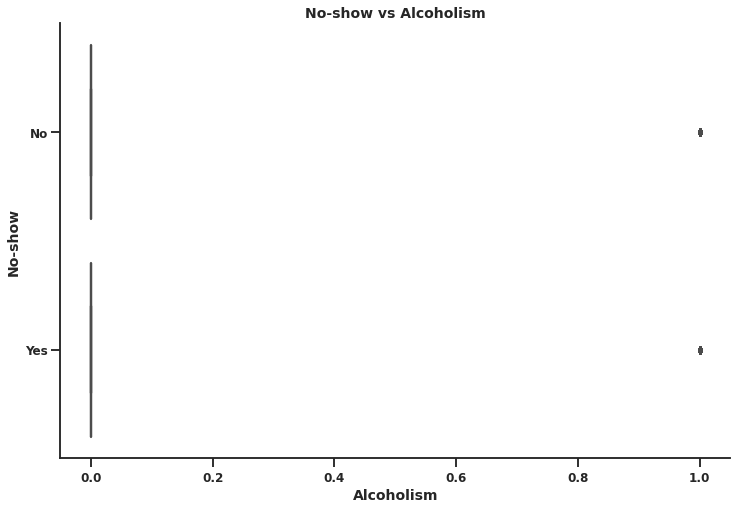

In [23]:
boxplot_cat(var = 'Alcoholism', df = df)

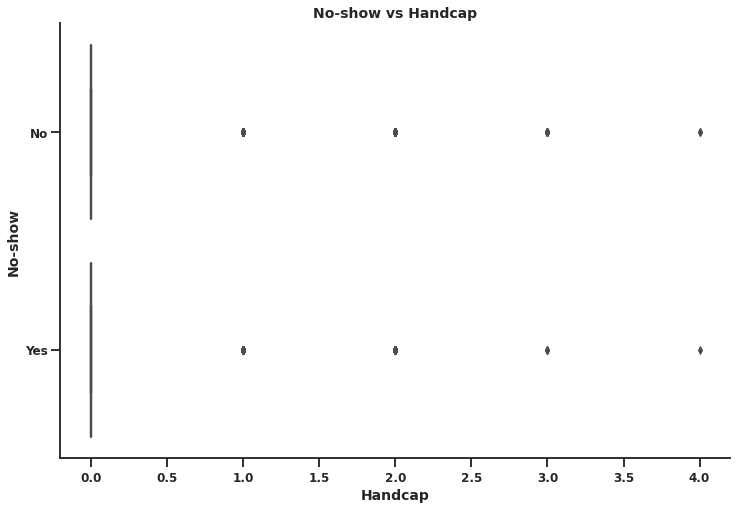

In [24]:
boxplot_cat(var = 'Handcap', df = df)

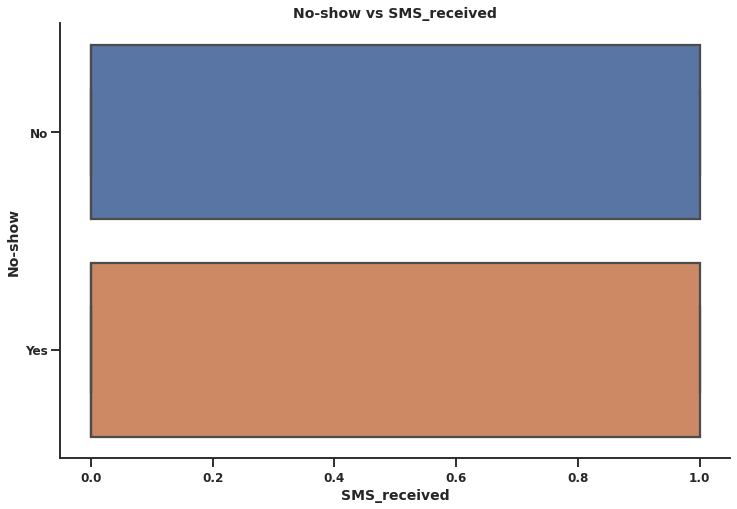

In [25]:
boxplot_cat(var = 'SMS_received', df = df)

>As shown from the boxplots above,we can not apply the outliers for categorical variables.

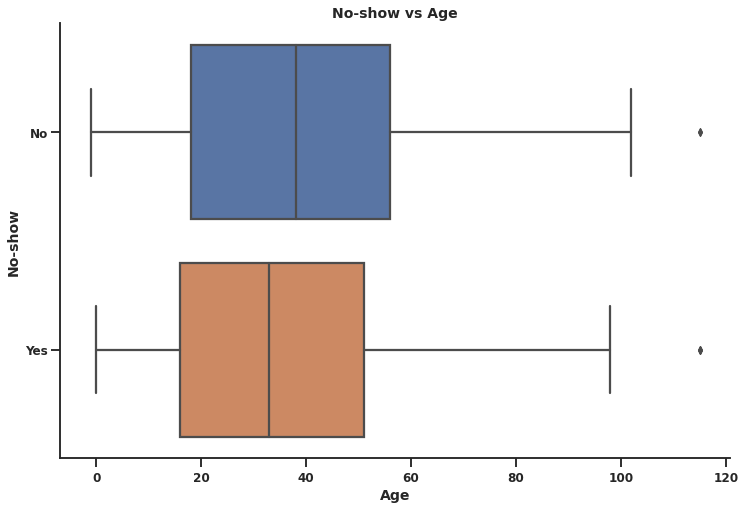

In [26]:
boxplot_cat(var = 'Age', df = df)

>For Age variable, we can see that there are some outliers shown in the plot.

#### Quick Method in Pandas – Describe( ) API
>We can use Describe( ) method to give us a quick summary statistics such as min, max, and mean, so we can get idea about outliers when comparing min, max and mean.

In [27]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

If you see in the pandas dataframe above, we can quick visualize outliers. For e.g. in Age column maximum value is 115, whereas mean is only 37.1.

In [28]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Visualization using Box plots, Histograms, Scatter plots
> We can use visualize the features and detect the outliers.

## Boxplot

- Box plot is a graphical depiction of a given data through its quantiles. 
- It is a very simple but effective way to visualize outliers. 
- By considering the lower and upper whiskers as the boundaries of the data distribution, any data points that show above or below the whiskers can be considered outliers.

The Graph below explain the components of bos plot:

Sources:

- https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

- https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


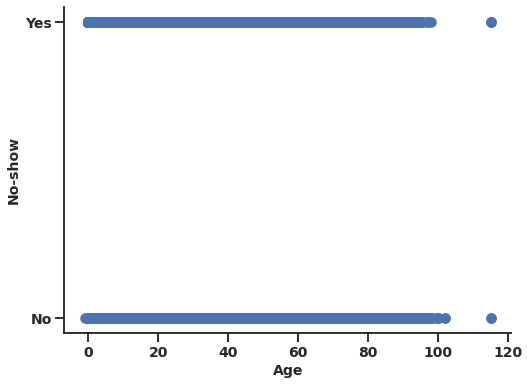

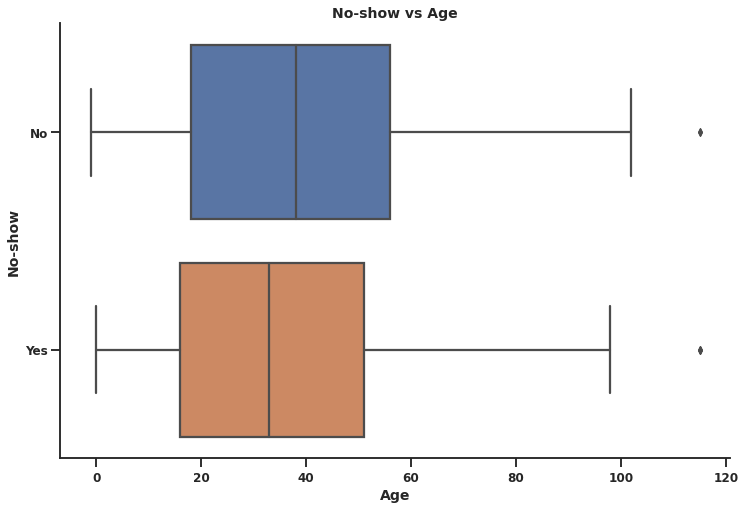

In [30]:
# Outlier Detection
scatterplot(df = df, var1 = 'Age', var2 = 'No-show')
boxplot_cat(var = 'Age', df = df)

> As shwon in the two graphs above, the boxplot represents the data better than the scatter plot.

> As shown in graphs, the outliers are detected above the upper whiskers

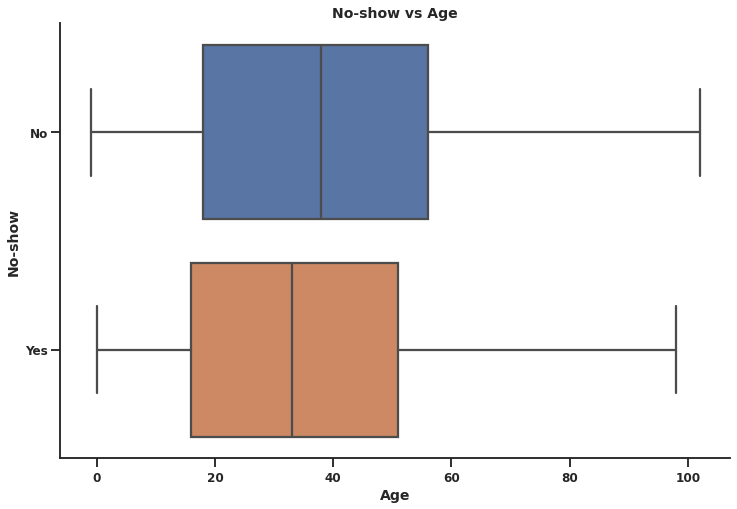

In [31]:
# delete outliers manually
df_train_vis = df.drop(df[(df['Age']>110)].index)
# reset index
df_train_vis = df_train_vis.reset_index(drop=True)
#scatterplot(df = df_train_vis, var1 = 'Age', var2 = 'No-show')
boxplot_cat(var = 'Age', df = df_train_vis)

#### Inter-Quartile Range (IQR) proximity rule

> We can use IQR to detect and remove the outliers.

In [33]:
# Create a function to detect the outliers and remove them.
def Outlier_removal_IQR(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    df_IQR = df.loc[(df[var] >= (Q1 - 1.5*IQR)) & (df[var] <= Q3 + 1.5*IQR)]
    return df_IQR

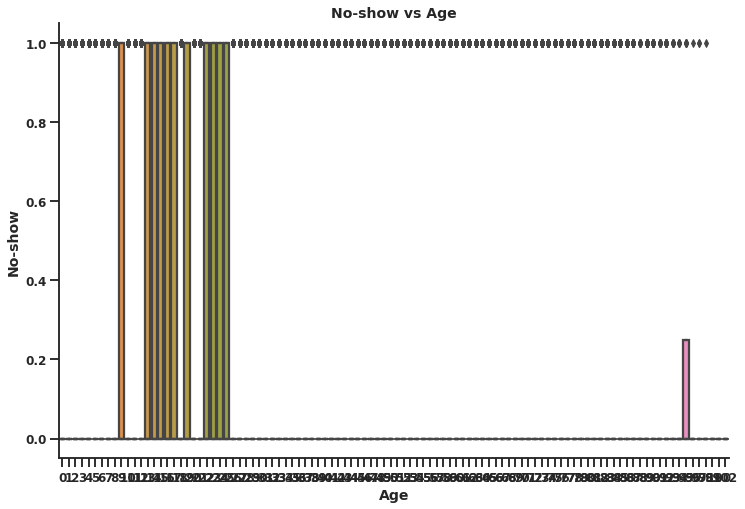

In [34]:
# Remove outliers using IQR
df_IQR = Outlier_removal_IQR(df = df, var = 'Age')
boxplot_cat(var = 'Age', df = df_IQR)

In [34]:
df_IQR.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99,  -1])

> **We can use histogram plot and check the outliers, for example, the points on the far left or right in the histogram may be outliers.**

In [19]:
def dist_plot(data,var, prop = True):
    fig = plt.figure(figsize = (10,8))
    sns.distplot(data, fit= norm)
    plt.title(var+" Distribution",fontsize = 14,fontweight='bold')
    plt.xlabel(var,fontsize = 14,fontweight='bold')
    plt.ylabel("Frequency",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold')
    plt.yticks(fontsize=14,fontweight='bold')
    if prop != True:
        pass
    else:
        fig = plt.figure(figsize = (10,8))
        res = stats.probplot(data, plot= plt)
        plt.title("Probability Plot",fontsize = 14,fontweight='bold')
        plt.xlabel("Theoretical Quantiles",fontsize = 14,fontweight='bold')
        plt.ylabel("Ordered Values",fontsize = 14,fontweight='bold')
        plt.xticks(fontsize=14,fontweight='bold');
        plt.yticks(fontsize=14,fontweight='bold');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


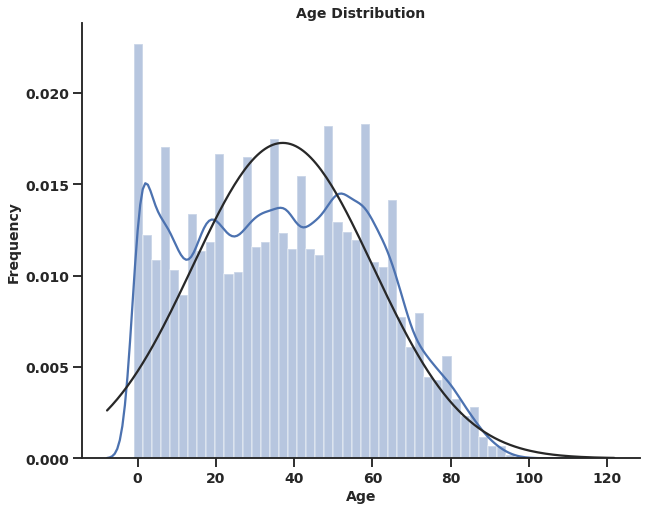

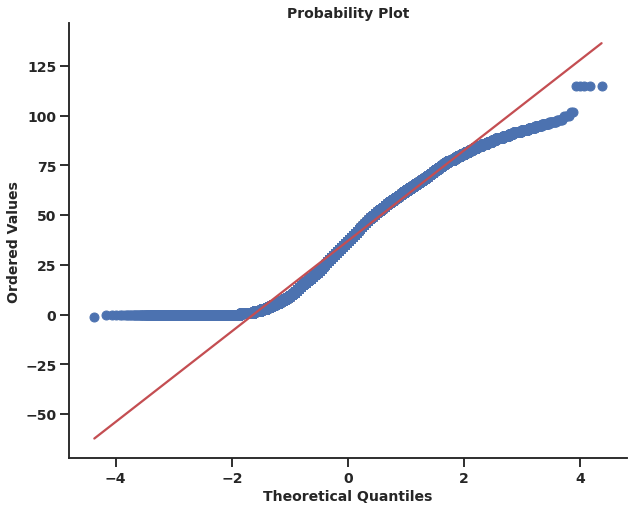

In [36]:
dist_plot(data = df.Age,var = 'Age', prop = True)

### Frequency of distinct values

In [37]:
# Count number of distinct elements for each feature:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [16]:
# Function to find the unique elements and the corresponding frequency
def unique_elements(df, feature):
    print(colored(feature +' feature has {} distinct elements as follows: {}\n'.format(len(df[feature].unique()),
                                                                                       df[feature].unique()),'green', attrs=['bold']))
    print(colored('The frequency of each unique element:','blue', attrs = ['bold']),'\n')
    print(df[feature].value_counts())

In [17]:
# Function to plot the frequency of distinct values for each feature
def count_plot(df, feature, size = (8, 5)):
    plt.figure(figsize = size)
    sns.countplot(x = df[feature], hue = df['No-show'], data = df)
    plt.title('Frequency of distinct values for ' + feature)
    plt.grid(True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [18]:
# Create a function to visualize the distribution percentages
def pie_plot(df, feature, labels,size = (8, 5)):
    data = df[feature].value_counts()
    plt.figure(figsize = size)
    colors = sns.color_palette('bright')
    plt.pie(data,labels = labels, autopct='%1.1f%%',colors = colors,textprops={'fontsize': 14})
    plt.title(feature +' Distribution')
    plt.axis('equal')
    #plt.legend(loc="best")
    plt.show()

In [42]:
# Check the unique values of PatientId feature:
unique_elements(df, feature = 'PatientId')

PatientId feature has 62299 distinct elements as follows: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]

The frequency of each unique element: 

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64


In [43]:
# Check the unique values of AppointmentID feature:
unique_elements(df, feature = 'AppointmentID')

AppointmentID feature has 110527 distinct elements as follows: [5642903 5642503 5642549 ... 5630692 5630323 5629448]

The frequency of each unique element: 

5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64


We are focusing on other features that affect the prediction.So, I will not focuss on IDs features more.

In [44]:
# Check the unique values of Gender feature:
unique_elements(df, feature = 'Gender')

Gender feature has 2 distinct elements as follows: ['F' 'M']

The frequency of each unique element: 

F    71840
M    38687
Name: Gender, dtype: int64


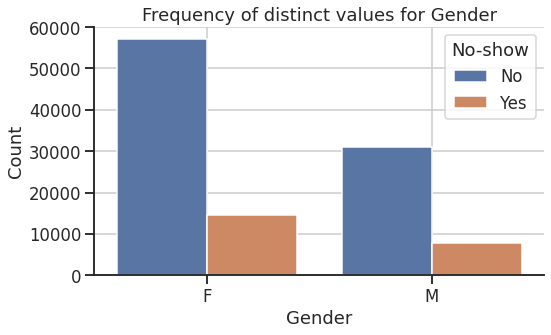

In [45]:
count_plot(df, feature = 'Gender')

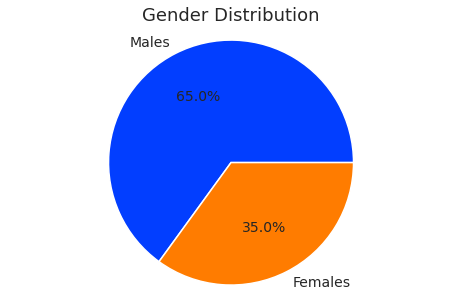

In [46]:
labels = 'Males','Females'
feature = "Gender"
pie_plot(df, feature, labels)

> **Males represent 65% of the dataset and females represent 35% only.**

In [47]:
# Check the unique values of Handcap feature:
unique_elements(df, feature ='Handcap')

Handcap feature has 5 distinct elements as follows: [0 1 2 3 4]

The frequency of each unique element: 

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


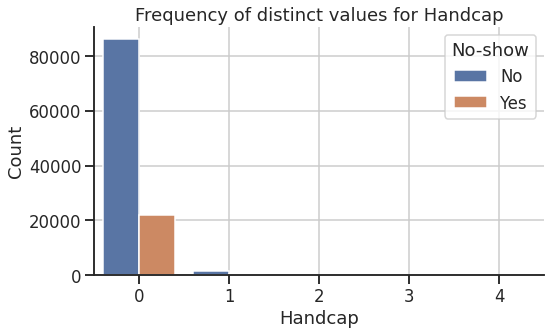

In [48]:
count_plot(df, feature = 'Handcap')

**Count the frequency of negative Age feature observations, and remove them**

In [49]:
# Check the unique values of Age feature:
unique_elements(df, feature ='Age')

Age feature has 104 distinct elements as follows: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]

The frequency of each unique element: 

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


In [50]:
# Count negative Ages
print(colored('The number of negative age observations = ','blue', attrs = ['bold']),df[df.Age<0].Age.count())
print('\nAs shown below:')
display(df[df.Age<0])

The number of negative age observations =  1

As shown below:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃƒO,0,0,0,0,0,0,No


In [7]:
# Remove negative Ages
df = df[(df.Age >= 0)]

In [52]:
# Check again the unique values of Age feature:
unique_elements(df, feature ='Age')

Age feature has 103 distinct elements as follows: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]

The frequency of each unique element: 

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


In [53]:
# For better visualizing the Age frequency distribution, I splitted the Age 
# data into two sets: Ages from 0-50 and Ages greater than 50
df1 = df[df.Age<=50]
df2 = df[df.Age>50]

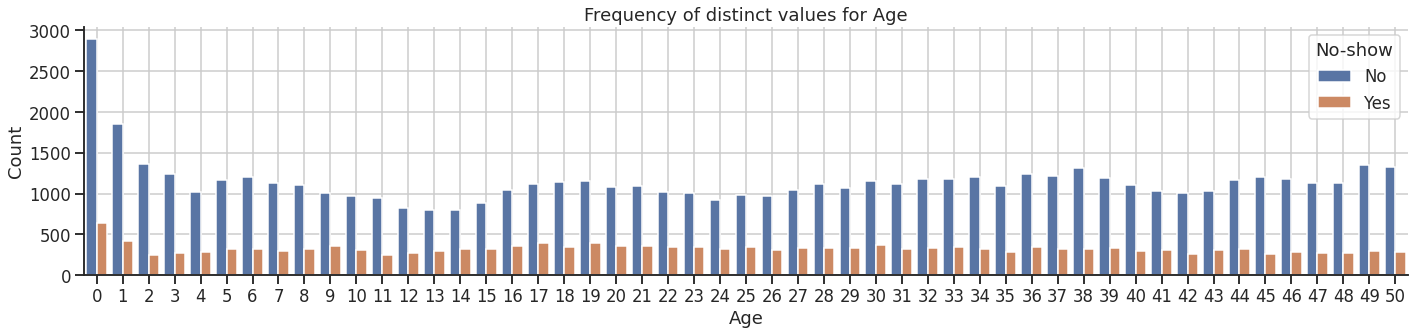

In [54]:
# Plot the Frequency of Age between 0 and 50
count_plot(df1, feature = 'Age', size = (20,5))

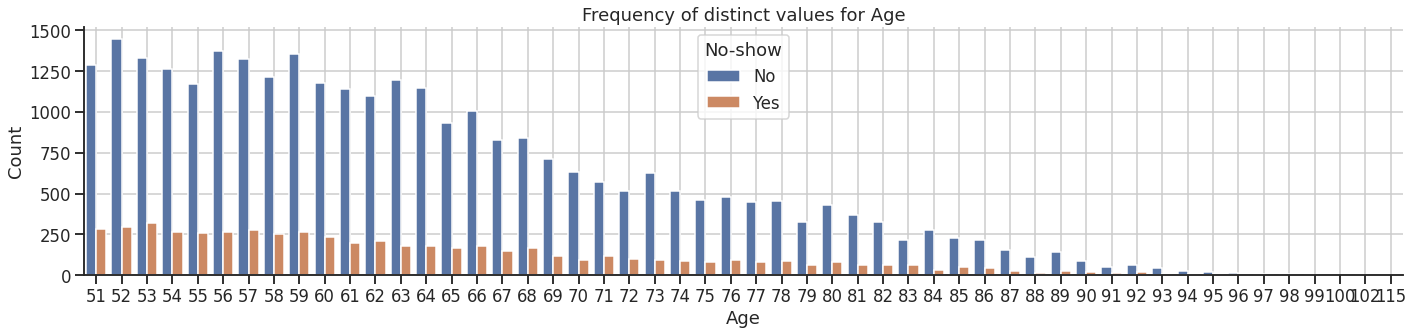

In [55]:
# Plot the Frequency of Age greater than 50
count_plot(df2, feature = 'Age', size = (20,5))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


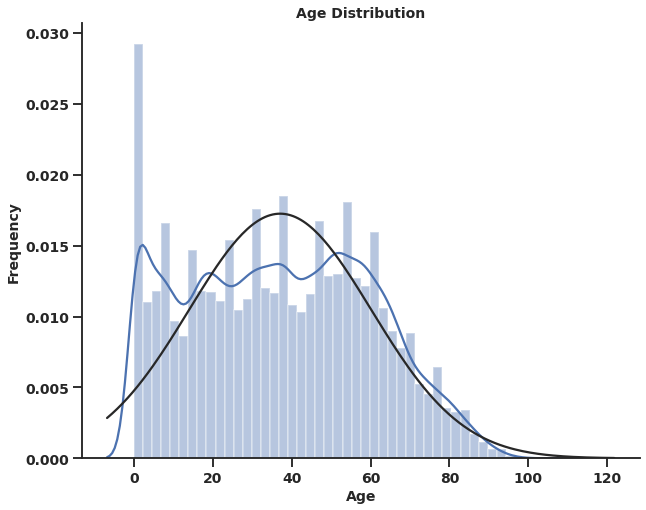

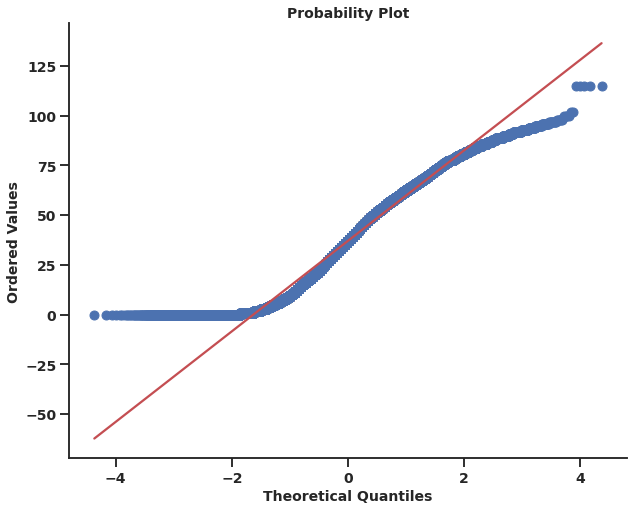

In [56]:
# The distribution of Age feature
dist_plot(data = df.Age,var = 'Age', prop = True)

Scholarship feature has 2 distinct elements as follows: [0 1]

The frequency of each unique element: 

0    99665
1    10861
Name: Scholarship, dtype: int64


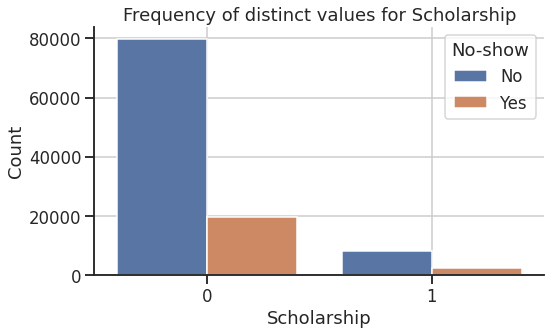

In [57]:
# Check the unique values of Scholarship feature:
unique_elements(df, feature ='Scholarship')
count_plot(df, feature = 'Scholarship')

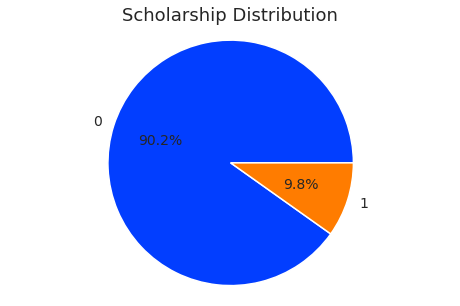

In [58]:
labels = 0,1
feature = "Scholarship"
pie_plot(df, feature, labels)

In [59]:
# Check the unique values of Neighbourhood feature:
unique_elements(df, feature ='Neighbourhood')
#count_plot(df, feature = 'Neighbourhood')

Neighbourhood feature has 81 distinct elements as follows: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÃšBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃƒO PEDRO' 'SANTA MARTHA'
 'SÃƒO CRISTÃ“VÃƒO' 'MARUÃ\x8dPE' 'GRANDE VITÃ“RIA' 'SÃƒO BENEDITO'
 'ILHA DAS CAIEIRAS' 'SANTO ANDRÃ‰' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÃ”NIO HONÃ“RIO'
 'RESISTÃŠNCIA' 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MONTE BELO'
 'MÃ\x81RIO CYPRESTE' 'SANTO ANTÃ”NIO' 'BELA VISTA' 'PRAIA DO SUÃ\x81'
 'SANTA HELENA' 'ITARARÃ‰' 'INHANGUETÃ\x81' 'UNIVERSITÃ\x81RIO'
 'SÃƒO JOSÃ‰' 'REDENÃ‡ÃƒO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÃ\x8dRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA DÂ´ARC' 'CONSOLAÃ‡ÃƒO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÃ\x8dZA' 'SANTA LÃšCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃƒO JOÃƒO' 'FONTE GRANDE'
 'ENSEADA DO SUÃ\

Hipertension feature has 2 distinct elements as follows: [1 0]

The frequency of each unique element: 

0    88725
1    21801
Name: Hipertension, dtype: int64


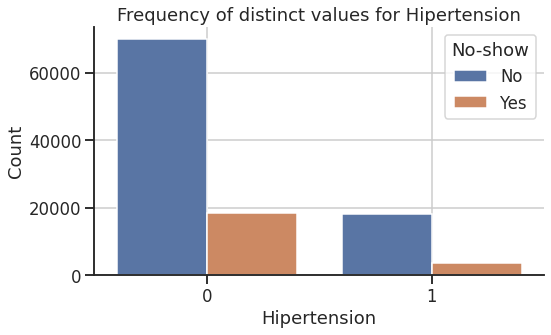

In [60]:
# Check the unique values of Hipertension feature:
unique_elements(df, feature ='Hipertension')
count_plot(df, feature = 'Hipertension')

Diabetes feature has 2 distinct elements as follows: [0 1]

The frequency of each unique element: 

0    102583
1      7943
Name: Diabetes, dtype: int64


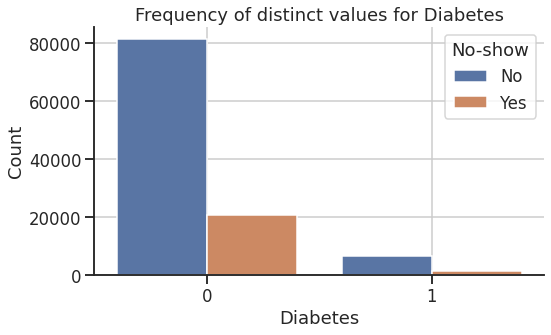

In [61]:
# Check the unique values of Diabetes feature:
unique_elements(df, feature ='Diabetes')
count_plot(df, feature = 'Diabetes')

Alcoholism feature has 2 distinct elements as follows: [0 1]

The frequency of each unique element: 

0    107166
1      3360
Name: Alcoholism, dtype: int64


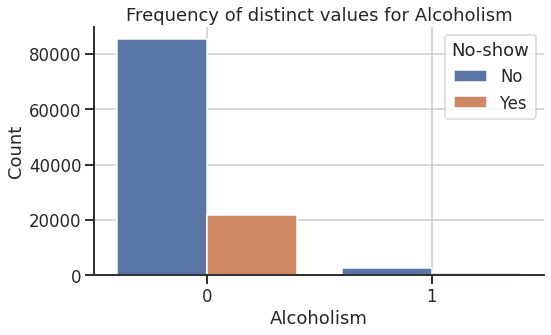

In [62]:
# Check the unique values of Alcoholism feature:
unique_elements(df, feature ='Alcoholism')
count_plot(df, feature = 'Alcoholism')

Handcap feature has 5 distinct elements as follows: [0 1 2 3 4]

The frequency of each unique element: 

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


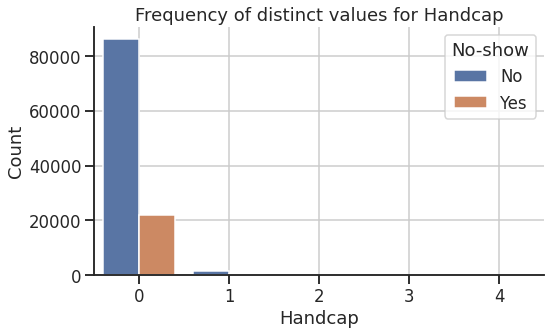

In [63]:
# Check the unique values of Handcap feature:
unique_elements(df, feature ='Handcap')
count_plot(df, feature = 'Handcap')

SMS_received feature has 2 distinct elements as follows: [0 1]

The frequency of each unique element: 

0    75044
1    35482
Name: SMS_received, dtype: int64


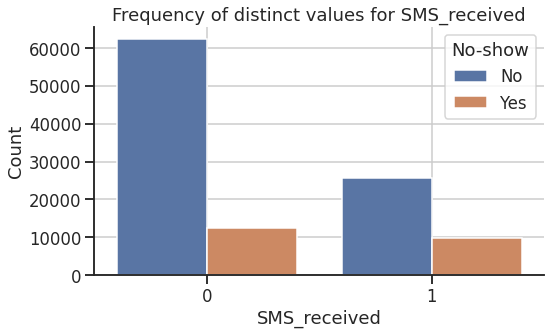

In [64]:
# Check the unique values of SMS_received feature:
unique_elements(df, feature ='SMS_received')
count_plot(df, feature = 'SMS_received')

No-show feature has 2 distinct elements as follows: ['No' 'Yes']

The frequency of each unique element: 

No     88207
Yes    22319
Name: No-show, dtype: int64


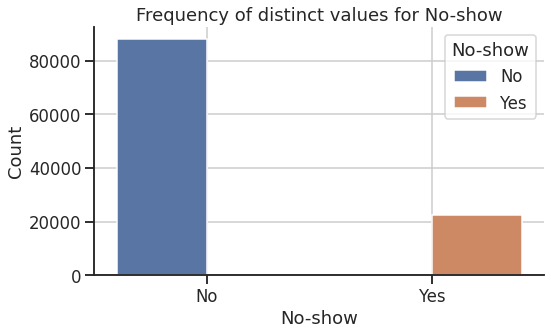

In [65]:
# Check the unique values of No-show class:
unique_elements(df, feature ='No-show')
count_plot(df, feature = 'No-show')

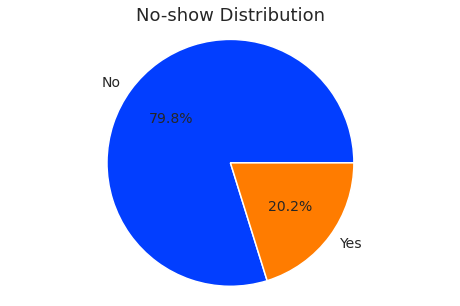

In [66]:
labels = 'No','Yes'
#labels = ["Attended","No-show"]
feature = "No-show"
pie_plot(df, feature, labels)

> **As shwon from the No-show distribution, the class is imbalance, since No label has around 80% of classes and Yes has around 20%.**

>  **Only 20.2% of patients showed, while 79.8% didnt show.**


### Convert ScheduledDay and AppointmentDay features into datetime

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [9]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Text(0.5, 1.0, "'Scheduled Date' Line chart")

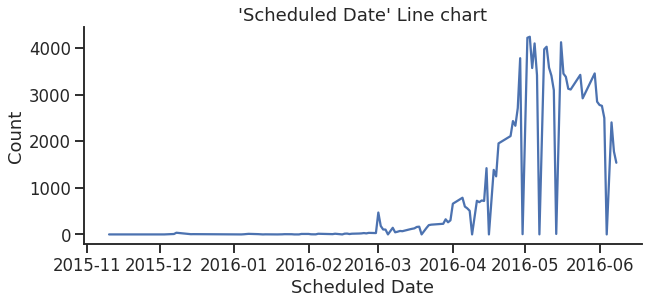

In [10]:
#  What is the most frequent scheduled date?
df["ScheduledDay"].dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Scheduled Date")
plt.ylabel("Count")
plt.title("'Scheduled Date' Line chart")

>**The most scheduled date is mainly between months 5 and 6 of 2016**

#### Break the date features into date components (year, month, day)

In [11]:
df1 = df.copy()

In [12]:
# seperate the date columns into year, month, day
df1['ScheduledDay_Y'] = df1['ScheduledDay'].dt.year
df1['ScheduledDay_M'] = df1['ScheduledDay'].dt.month
df1['ScheduledDay_D'] = df1['ScheduledDay'].dt.day
#df.drop(['ScheduledDay'], axis=1, inplace=True)

df1['AppointmentDay_Y'] = df1['AppointmentDay'].dt.year
df1['AppointmentDay_M'] = df1['AppointmentDay'].dt.month
df1['AppointmentDay_D'] = df1['AppointmentDay'].dt.day
#df.drop(['AppointmentDay'], axis=1, inplace=True)
df1.head(2).T

,0,1
PatientId,29872499824296.0,558997776694438.0
AppointmentID,5642903,5642503
Gender,F,M
ScheduledDay,2016-04-29 00:00:00,2016-04-29 00:00:00
AppointmentDay,2016-04-29 00:00:00,2016-04-29 00:00:00
Age,62,56
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA
Scholarship,0,0
Hipertension,1,0
Diabetes,0,0


In [13]:
# Create a new feature AwaitingTime as a difference between AppointmentDay and ScheduledDay
df['AwaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['AwaitingTime'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

In [14]:
# Convert the negative values into positive:
df['AwaitingTime'] = df['AwaitingTime'].abs()
df['AwaitingTime'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123])

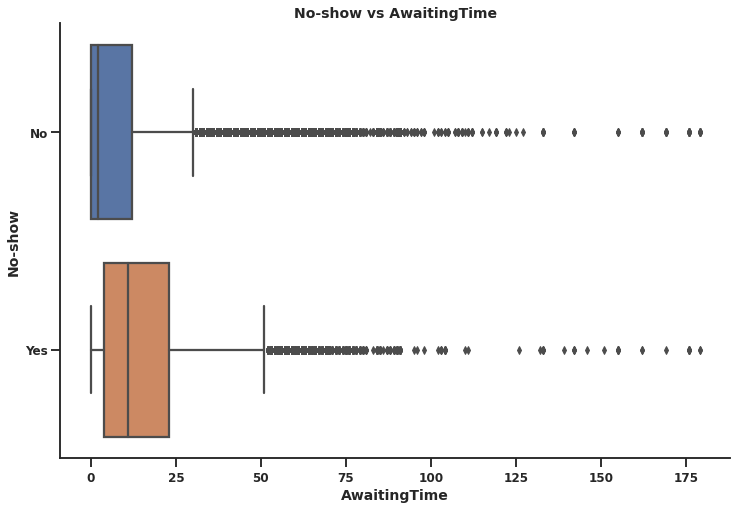

In [21]:
# Check for Ouliers in AwaitingTime
boxplot_cat(var = 'AwaitingTime', df = df)

> **As shown in the plot above, there are many points seen as outliers, let's see the shape of the boxplot after removing these outliers.**

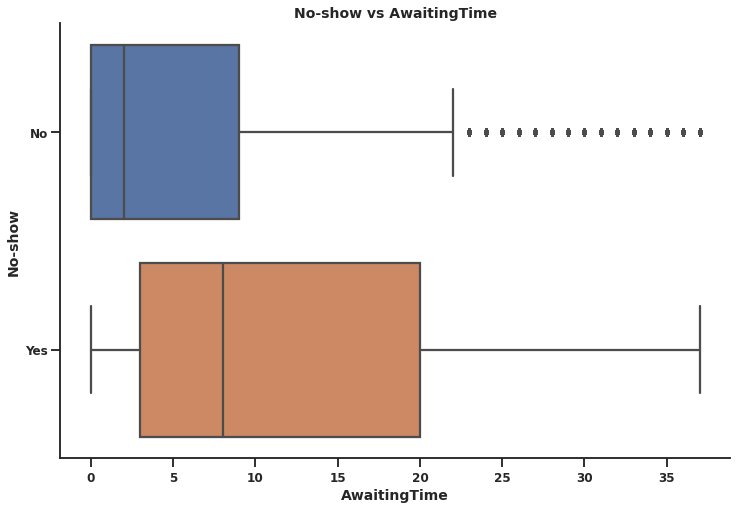

In [75]:
df_IQR_AwaitingTime = Outlier_removal_IQR(df = df, var = 'AwaitingTime')
boxplot_cat(var = 'AwaitingTime', df = df_IQR_AwaitingTime)

> **The boxplot looks better after removing the outliers, however, I do not think it is a good idea to remove these points since these points came from the dffierence betwwen AppointmentDay and ScheduledDay. Also, removing these points will result with data loss. So, I will not remove them from the training dataset.**


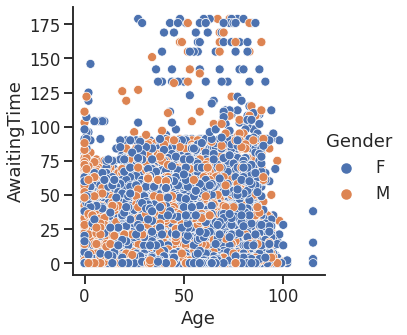

In [76]:
# Age and AwaitingTime distribution
sns.relplot(data=df, x="Age", y="AwaitingTime", hue="Gender")

### Encode the string categorical values into an integer code

In [22]:
# PatientID -> Object to Int (Categorical)
df['PatientId'].astype('int64')
df.set_index('AppointmentID', inplace = True)
# No-show -> Str to Int (Categorical)
df['No-show'] = df['No-show'].map({'No':0, 'Yes':1})
# Gender -> Str to Int(Categorical)
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [23]:
# Create new feature: Number of Appointments as Appointments
df['Appointments'] = df.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()
# Create new feature: Count a patient make a preious no show
df['NoShow_Appointments'] = (df[df['Appointments'] > 0].sort_values(['PatientId', 'ScheduledDay']).groupby(['PatientId'])['No-show'].cumsum() / df[df['Appointments'] > 0]['Appointments'])
# Number of Appointments Missed by Patient
df['Missed_Appointments'] = df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())

In [24]:
# Determine columns with missings
df.loc[:, df.isnull().any()].columns

Index(['NoShow_Appointments'], dtype='object')

In [80]:
df.isnull().sum()

PatientId                  0
Gender                     0
ScheduledDay               0
AppointmentDay             0
Age                        0
Neighbourhood              0
Scholarship                0
Hipertension               0
Diabetes                   0
Alcoholism                 0
Handcap                    0
SMS_received               0
No-show                    0
AwaitingTime               0
Appointments               0
NoShow_Appointments    62298
Missed_Appointments        0
dtype: int64

In [25]:
# Fill Nan values with 0
df['NoShow_Appointments'] = df['NoShow_Appointments'].fillna(0)
df['NoShow_Appointments']

AppointmentID
5642903    0.0
5642503    0.0
5642549    0.0
5642828    0.0
5642494    0.0
          ... 
5651768    0.0
5650093    0.0
5630692    0.0
5630323    0.0
5629448    0.0
Name: NoShow_Appointments, Length: 110526, dtype: float64

In [26]:
df1 = df.copy()

In [27]:
# Encode Neighbourhood using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder_neighbourhood = LabelEncoder()

df1['Neighbourhood_enc'] = encoder_neighbourhood.fit_transform(df1['Neighbourhood'])

In [85]:
df1.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,Appointments,NoShow_Appointments,Missed_Appointments,Neighbourhood_enc
AppointmentID,,,,,,,,,,,,,,,,,,
5642903,2.987250e+13,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,0,0.0,0,39
5642503,5.589978e+14,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0,0.0,0,39


In [28]:
# Remove some columns
df.drop(['ScheduledDay'], axis=1, inplace=True)
df.drop(['AppointmentDay'], axis=1, inplace=True)
df.drop('PatientId', axis=1,inplace = True)
df.drop('Neighbourhood', axis=1,inplace = True)

In [29]:
# Remove some columns
df1.drop(['ScheduledDay'], axis=1, inplace=True)
df1.drop(['AppointmentDay'], axis=1, inplace=True)
df1.drop('PatientId', axis=1,inplace = True)
df1.drop('Neighbourhood', axis=1,inplace = True)

### Correlation Matrix (Heartmap)

> The correlation between the variables is important to get some insights about the relationships between fetures and between feature and the target variable (No-show).



In [88]:
df.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,Appointments,NoShow_Appointments,Missed_Appointments
Gender,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.004122,-0.028415,0.076860,-0.016251,0.009535
Age,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.034822,0.051096,-0.028453,-0.044591
Scholarship,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.030427,0.005670,0.032305,0.046821
Hipertension,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,-0.017224,-0.006765,-0.018970,-0.023957
Diabetes,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.027193,-0.016312,-0.005821,-0.010350
Alcoholism,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.038522,0.156487,0.006315,0.006887
Handcap,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.019831,0.008491,0.006751,0.019701
SMS_received,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.398138,-0.075591,0.025987,0.049001
No-show,-0.004122,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000,0.186253,-0.035732,0.500492,0.582543
AwaitingTime,-0.028415,0.034822,-0.030427,-0.017224,-0.027193,-0.038522,-0.019831,0.398138,0.186253,1.000000,-0.125335,-0.001438,0.061303


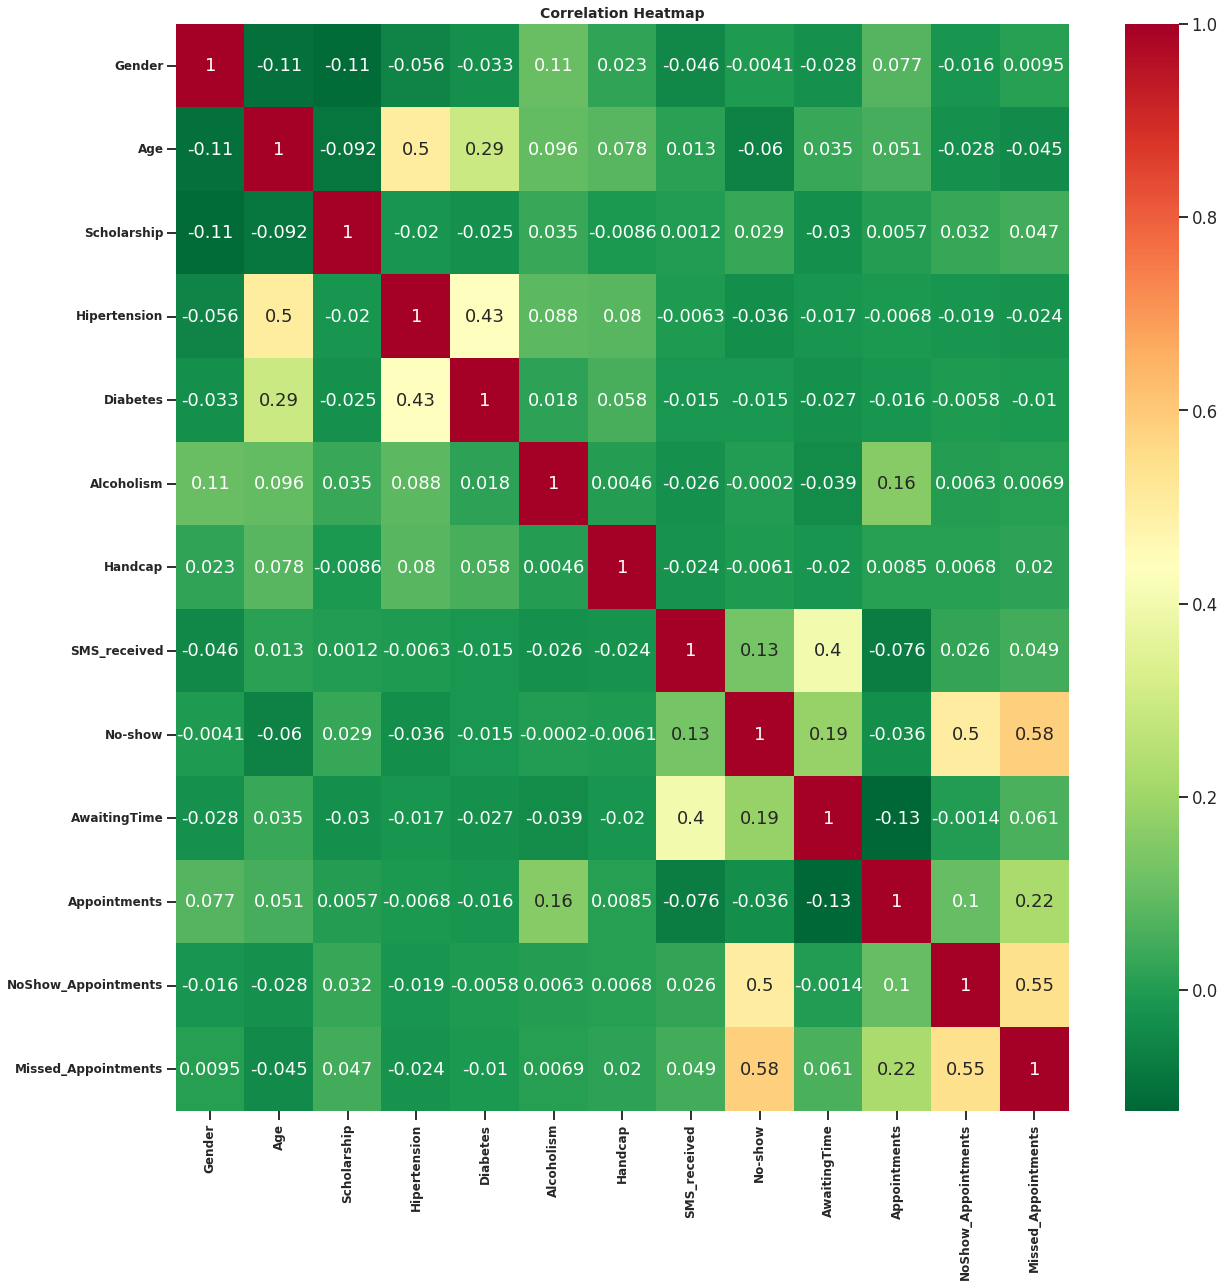

In [90]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
#fig = plt.figure(figsize=(20, 16))
#sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")
sns.heatmap(corrmat, annot=True, xticklabels=corrmat.columns, yticklabels=corrmat.columns,cmap="RdYlGn_r");
plt.title("Correlation Heatmap", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold');
plt.yticks(fontsize=12,fontweight='bold');

**Heatmap shows these correlations:**

1. **Hypertension and Age** have moderate postive correlation (0.5)
2. **Hypertension and Diabetes** have moderate postive correlation (0.43)
3. **Diabetes and Age** have moderate postive correlation (0.29)

>These are medically expected results.


4. **Alcoholism and Appointments** have weak correlation (0.16)
5. **SMS_received and No-show** have weak correlation (0.13)
6. **SMS_received and AwaitingTime** have moderate correlation (0.4)
7. **No-show and NoShow_Appointments** have moderate correlation (0.5)
8. **No-show and Missed_Appointments** have moderate correlation (0.58)

>There are no features are highly correlated to each other, so I will not drop features.

> In case if I want to drop features based on the moderate correlation values, I would drop (Hypertension or Age, they have very low correlation to No-show, so doesnot matter which one to be removed) or (SMS_received since AwaitingTime has higher correlation with No-show).

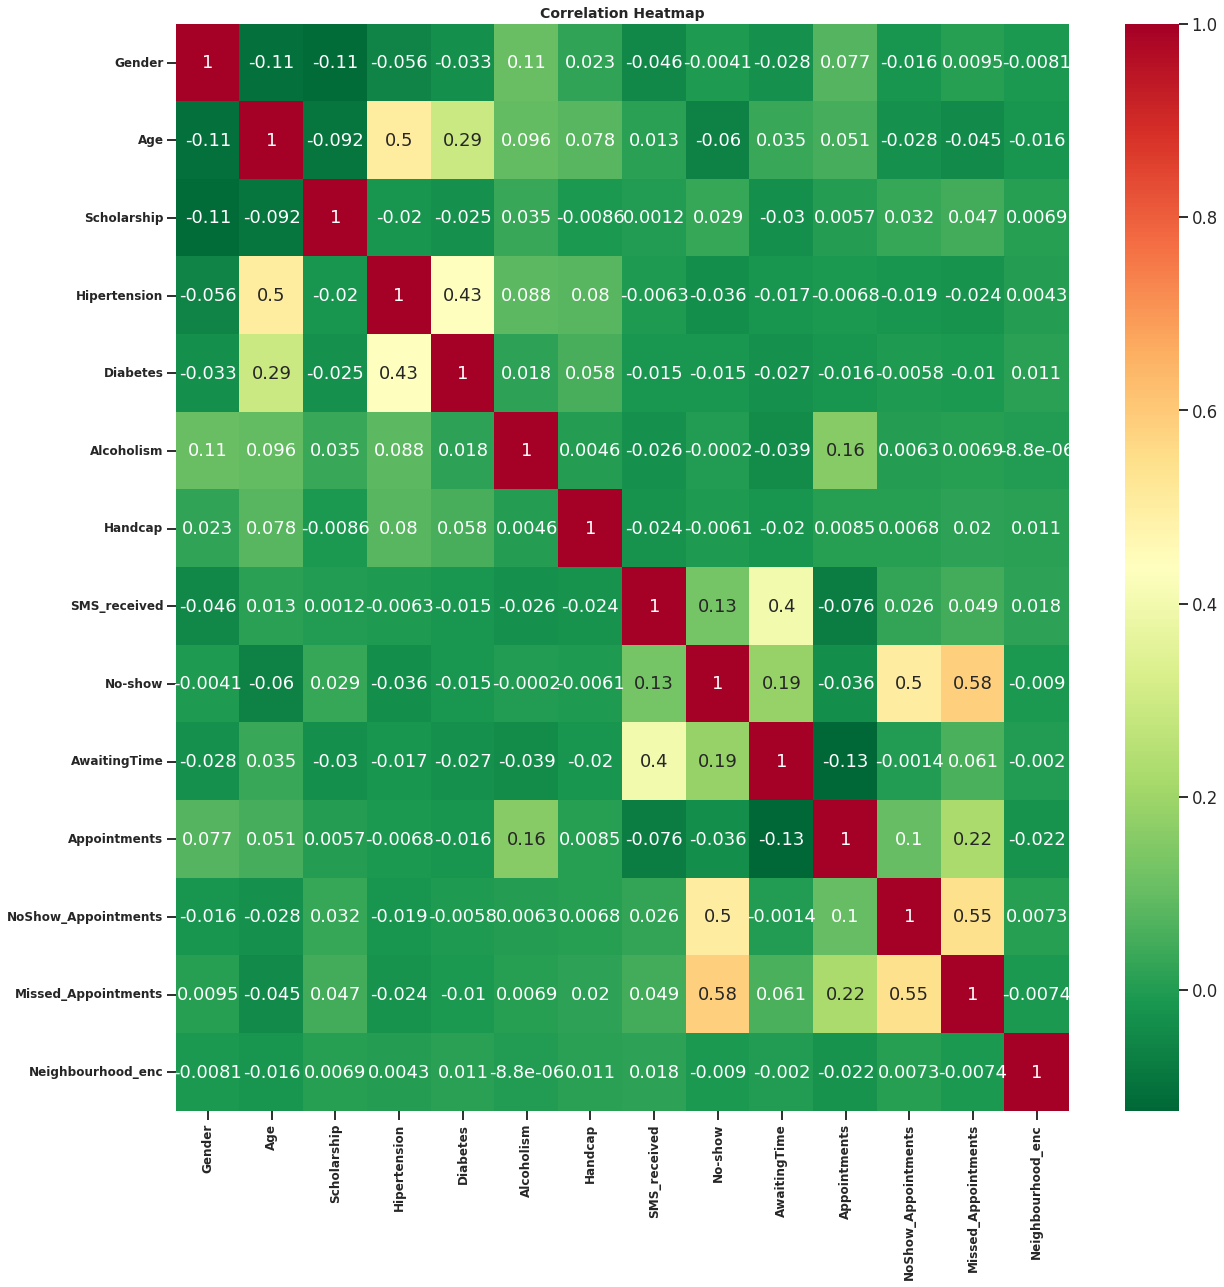

In [91]:
#correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(20, 20))
#fig = plt.figure(figsize=(20, 16))
#sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")
sns.heatmap(corrmat, annot=True, xticklabels=corrmat.columns, yticklabels=corrmat.columns,cmap="RdYlGn_r");
plt.title("Correlation Heatmap", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold');
plt.yticks(fontsize=12,fontweight='bold');

Neighbourhood does not have high correlation with our target variable

In [30]:
# Drop the correlated features and check later if that affect the performace of our models
#df2 = df.copy()
#df2.drop(['SMS_received', 'Hypertension'], axis=1, inplace=True)

**Convert Handcap variable into dummy variables**

In [31]:
#Convert to Categorical
df['Handcap'] = pd.Categorical(df['Handcap'])
#Convert to Dummy Variables
Handicap = pd.get_dummies(df['Handcap'], prefix = 'Handicap')
df = pd.concat([df, Handicap], axis=1)
df.drop(['Handcap'], axis=1, inplace = True)

In [35]:
# Remove the outliers from the Age feature
df = Outlier_removal_IQR(df = df, var = 'Age')

In [95]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99])

In [96]:
# Check if the data is in the proper format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 5642903 to 5629448
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               110521 non-null  int64  
 1   Age                  110521 non-null  int64  
 2   Scholarship          110521 non-null  int64  
 3   Hipertension         110521 non-null  int64  
 4   Diabetes             110521 non-null  int64  
 5   Alcoholism           110521 non-null  int64  
 6   SMS_received         110521 non-null  int64  
 7   No-show              110521 non-null  int64  
 8   AwaitingTime         110521 non-null  int64  
 9   Appointments         110521 non-null  int64  
 10  NoShow_Appointments  110521 non-null  float64
 11  Missed_Appointments  110521 non-null  int64  
 12  Handicap_0           110521 non-null  uint8  
 13  Handicap_1           110521 non-null  uint8  
 14  Handicap_2           110521 non-null  uint8  
 15  Handicap_3

#### Define features vector X and target variable y

In [36]:
# Find X and y
X = df.drop(['No-show'], axis=1)
y = df['No-show']

In [37]:
# Find X and y
X1 = df1.drop(['No-show'], axis=1)
y1 = df1['No-show']

In [99]:
X.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,AwaitingTime,Appointments,NoShow_Appointments,Missed_Appointments,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
AppointmentID,,,,,,,,,,,,,,,,
5642903,0,62,0,1,0,0,0,0,0,0.0,0,1,0,0,0,0
5642503,1,56,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0
5642549,0,62,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0
5642828,0,8,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0
5642494,0,56,0,1,1,0,0,0,0,0.0,0,1,0,0,0,0


#### Normalizing

In [38]:
# Features normalizing (min_max normalization)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [39]:
# Features normalizing (min_max normalization)
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

## Split the dataset into train and test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3)

# Models 

In [42]:
# Function to calculate the classification metrics: Accuracy, Sensitivity, Specificity, 
# roc_auc, Confusion matrix, and Classification report
def classification_metrics(y_test_pred, y_train_pred, y_train, y_test, model_name):
    # Model Accuracy
    model_accur = accuracy_score(y_test, y_test_pred)
    # Training accuracy
    training_accur = accuracy_score(y_train, y_train_pred)
    # Test accuracy
    test_accur = accuracy_score(y_test, y_test_pred)
    # Sensitivity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1)
    # Specificity
    specificity = recall_score(y_test, y_test_pred, pos_label=0)
    # roc_auc
    roc_auc = roc_auc_score(y_test, y_test_pred)
    
    model = {'Model': model_name, 'Training Accuracy': training_accur,
             'Test Accuracy': test_accur,'Sensitivity':sensitivity,
             'Specificity':specificity, 'ROC_AUC':roc_auc}
    model_df = pd.DataFrame(model, index=[0])
    #display(NB_model_df)
    
    print('The accuracy score of {}: {:.3f}'.format(model_name, model_accur))
    print("\nTraining accuracy of {}: {:.3f}".format(model_name, training_accur))
    print("\nTest accuracy of {}: {:.3f}".format(model_name, test_accur))
    print("\nSensitivity Score of {}: {:.3f}".format(model_name, sensitivity))
    print("\nSpecificity Score of {}: {:.3f}".format(model_name, specificity))
    print("\nThe roc_auc of {}: {:.3f}".format(model_name, roc_auc))
    # Classification report
    print("\nClassification report of NB model:\n\n", classification_report(y_test,y_test_pred))
    print('Confusion Matrix:')
    
    # Confusion matrix
    font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12}
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    #plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, cmap="Greens",fmt='d')
    plt.ylabel('Predicted',fontdict=font)
    plt.xlabel('Actual',fontdict=font)
    plt.title('Confusion Matrix NB',fontdict=font)
    plt.xticks(fontsize=12);plt.yticks(fontsize=12)
    plt.show()
    print('Summary of classification metrics:')
    display(model_df)
    return model_df

    

In [43]:
# Create a function to plot roc_curve
def roc_curve_plot(X_test, y_test, model, model_name):
    # Calculating the false positive and true positive rates
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    FP_rate, TP_rate, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(10,6))
    plt.plot(FP_rate, TP_rate, label=f'{model_name} (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC for '+model_name+' Classifier for Predicting No-show')
    plt.legend(loc="lower right")
    plt.show()

### Naïve Bayes classifier

In [137]:
#Create a Gaussian Classifier
NB_base1 = GaussianNB()
# Train the model using the training sets
NB_base1.fit(X_train1, y_train1)

GaussianNB()

The accuracy score of NB_base1: 0.796

Training accuracy of NB_base1: 0.799

Test accuracy of NB_base1: 0.796

Sensitivity Score of NB_base1: 0.000

Specificity Score of NB_base1: 1.000

The roc_auc of NB_base1: 0.500

Classification report of NB model:

               precision    recall  f1-score   support

           0       0.80      1.00      0.89     26380
           1       0.00      0.00      0.00      6778

    accuracy                           0.80     33158
   macro avg       0.40      0.50      0.44     33158
weighted avg       0.63      0.80      0.71     33158

Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


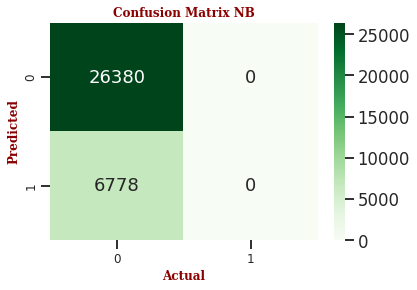

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,NB_base1,0.799129,0.795585,0.0,1.0,0.5


In [136]:
#Predict Output
y_test_pred_NB1 = NB_base1.predict(X_test1)
y_train_pred_NB1 = NB_base1.predict(X_train1)
# Obtain Classification Mterics
model_name = 'NB_base1'
NB_base_df1 = classification_metrics(y_test_pred_NB1, y_train_pred_NB1, y_train1, y_test1,model_name)

In [44]:
#Create a Gaussian Classifier
NB_base = GaussianNB()
# Train the model using the training sets
NB_base.fit(X_train, y_train)

GaussianNB()

In [45]:
#Predict Output
y_test_pred_NB = NB_base.predict(X_test)
y_train_pred_NB = NB_base.predict(X_train)

The accuracy score of NB_base: 0.847

Training accuracy of NB_base: 0.845

Test accuracy of NB_base: 0.847

Sensitivity Score of NB_base: 0.471

Specificity Score of NB_base: 0.941

The roc_auc of NB_base: 0.706

Classification report of NB model:

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26555
           1       0.67      0.47      0.55      6602

    accuracy                           0.85     33157
   macro avg       0.77      0.71      0.73     33157
weighted avg       0.84      0.85      0.84     33157

Confusion Matrix:


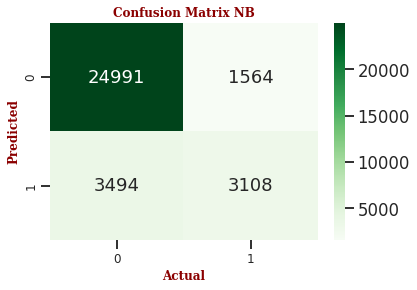

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,NB_base,0.844954,0.847453,0.470766,0.941103,0.705935


In [46]:
# Obtain Classification Mterics
model_name = 'NB_base'
NB_base_df = classification_metrics(y_test_pred_NB, y_train_pred_NB, y_train, y_test,model_name)

In [47]:
# Check for overfitting/underfitting and underfitting
print('Training accuracy:', NB_base_df['Training Accuracy'].values)
print('Test accuracy:', NB_base_df['Test Accuracy'].values)

Training accuracy: [0.84495373]
Test accuracy: [0.84745303]


> The training and testing accuracy values are quite comparable. So, there is no sign of overfitting.

**Compare model accuracy with null accuracy**

- Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [48]:
# Check the class distribution in the test set.
y_test.value_counts()

0    26555
1     6602
Name: No-show, dtype: int64

We can see that the occurences of most frequent class is 26486. So, we can calculate null accuracy by dividing 26486 by total number of occurences.

In [49]:
# check null accuracy score

null_accuracy = (26486/(6671+26486))

print('Null accuracy score: {0:0.3f}'. format(null_accuracy))

Null accuracy score: 0.799


- Model accuracy score = 0.84603553
- Null accuracy score = 0.799. 

=> Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

In [50]:
# We can calcuate the accuracy, Sensitivity, and Specificity manually from confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_NB)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))
# from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Confusion Matrix : 
 [[24991  1564]
 [ 3494  3108]]
Accuracy :  0.8474530265102391
Sensitivity :  0.9411033703633968
Specificity :  0.470766434413814


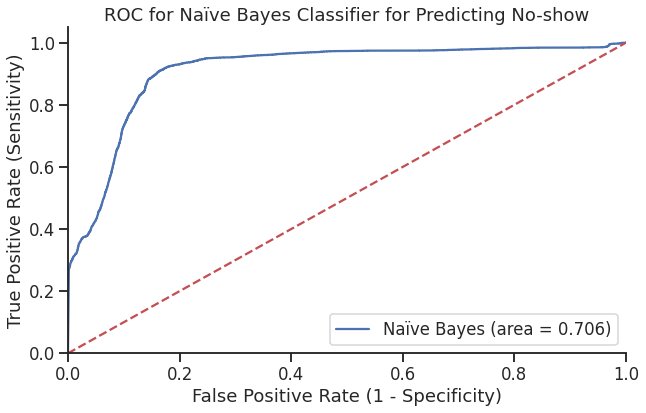

In [51]:
model_name = 'Naïve Bayes'
roc_curve_plot(X_test, y_test, NB_base,model_name)

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model is around 0.7. So, we can conclude that our classifier does a good job.

#### Tune the NB model using GridSearchCV

In [52]:
from sklearn.model_selection import ShuffleSplit

In [53]:
NB_clf= GaussianNB()
param_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 
                      1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cv=5
grid_search_NB = GridSearchCV(NB_clf, param_grid=param_grid, cv=cv)
grid_search_NB.fit(X_train, y_train)

# The best parameters obtained from grid search:
print("The best parameters for NB model from Grid Search:\n",grid_search_NB.best_params_,'\n')
print("The mean accuracy of NB model is:",grid_search_NB.best_score_)


The best parameters for NB model from Grid Search:
 {'var_smoothing': 1e-05} 

The mean accuracy of NB model is: 0.8485394226626454


In [54]:
# store the best NB model
best_NB = grid_search_NB.best_estimator_

In [55]:
# compare the model after parameters tuning to its base model to check if we got a better model
best_NB_accur=accuracy_score(y_test, best_NB.predict(X_test))
#print('The accuracy score of DT_base_model:',DT_base_model_accur)
print('The accuracy score of best NB model: {:.3f}'.format(best_NB_accur))

The accuracy score of best NB model: 0.848


In [56]:
best_NB.fit(X_train, y_train) # fit the NB model to the training data

#Predict Output
best_NB_pred_test = best_NB.predict(X_test)   # let the model predict the test data
best_NB_pred_train = best_NB.predict(X_train)   # let the model predict the test data

The accuracy score of NB: 0.848

Training accuracy of NB: 0.845

Test accuracy of NB: 0.848

Sensitivity Score of NB: 0.471

Specificity Score of NB: 0.941

The roc_auc of NB: 0.706

Classification report of NB model:

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26555
           1       0.67      0.47      0.55      6602

    accuracy                           0.85     33157
   macro avg       0.77      0.71      0.73     33157
weighted avg       0.84      0.85      0.84     33157

Confusion Matrix:


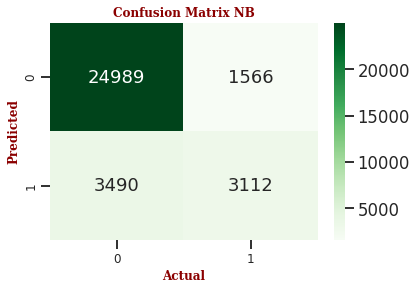

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,NB,0.844954,0.847513,0.471372,0.941028,0.7062


In [57]:
# Obtain Classification Mterics
model_name = 'NB'
Best_NB_df = classification_metrics(best_NB_pred_test, best_NB_pred_train, y_train, y_test,model_name)

In [58]:
# Check for overfitting/underfitting and underfitting
print('Training accuracy:', Best_NB_df['Training Accuracy'].values)
print('Test accuracy:', Best_NB_df['Test Accuracy'].values)

Training accuracy: [0.84495373]
Test accuracy: [0.84751335]


- The training accuracy values are quite comparable. So, there is  sign of overfitting.

**Compare model accuracy with null accuracy**

- Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.


In [59]:
# Check the class distribution in the test set.
y_test.value_counts()

0    26555
1     6602
Name: No-show, dtype: int64

In [60]:
# check null accuracy score

null_accuracy = (26486/(6671+26486))

print('Null accuracy score: {0:0.3f}'. format(null_accuracy))

Null accuracy score: 0.799



- Model accuracy score = 0.8465784
- Null accuracy score = 0.799. 

=> Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

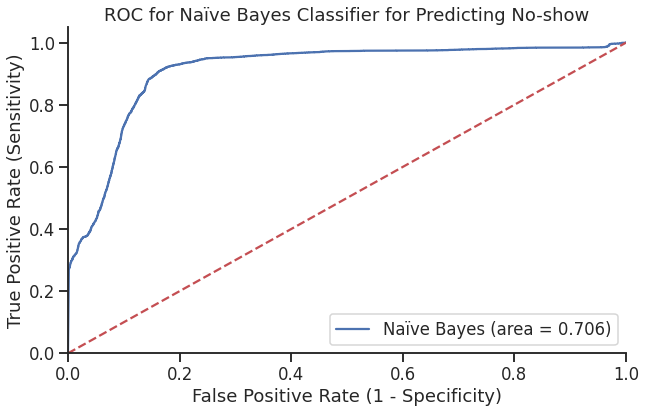

In [61]:
model_name = 'Naïve Bayes'
roc_curve_plot(X_test, y_test, best_NB,model_name)

ROC AUC of our model is around 0.7. So, we can conclude that our classifier does a good job compared with the baseline model.

### Decision Tree model

In [62]:
# Train the model
DT_base = DecisionTreeClassifier()
DT_base.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
#Predict Output
y_pred_DT_test = DT_base.predict(X_test)
y_pred_DT_train = DT_base.predict(X_train)

The accuracy score of DT_base: 0.949

Training accuracy of DT_base: 0.995

Test accuracy of DT_base: 0.949

Sensitivity Score of DT_base: 0.861

Specificity Score of DT_base: 0.970

The roc_auc of DT_base: 0.916

Classification report of NB model:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97     26555
           1       0.88      0.86      0.87      6602

    accuracy                           0.95     33157
   macro avg       0.92      0.92      0.92     33157
weighted avg       0.95      0.95      0.95     33157

Confusion Matrix:


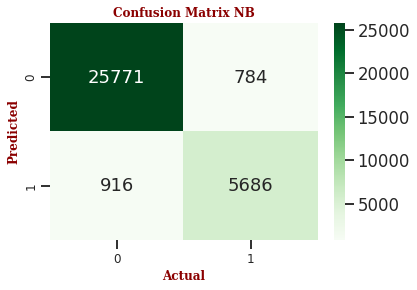

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,DT_base,0.995024,0.948729,0.861254,0.970476,0.915865


In [64]:
# Obtain Classification Mterics
model_name = 'DT_base'
DT_df = classification_metrics(y_pred_DT_test, y_pred_DT_train, y_train, y_test,model_name)

#### Grid Search Cross Validation for DT

In [65]:
DT_cross = DecisionTreeClassifier()
param_grid = {"criterion": ["gini", "entropy"], "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20]}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cv=5
grid_search_DT = GridSearchCV(DT_cross, param_grid = param_grid, cv = cv)
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [66]:
# The best parameters obtained from grid search:
print("The best parameters for DT model from Grid Search:\n",grid_search_DT.best_params_,'\n')
print("The mean accuracy of DT model is:",grid_search_DT.best_score_)

The best parameters for DT model from Grid Search:
 {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 2} 

The mean accuracy of DT model is: 0.9666178371391642


In [67]:
# store the best DT model
best_DT = grid_search_DT.best_estimator_

In [68]:
# compare the model after parameters tuning to its base model to check if we got a better model
best_DT_accur = accuracy_score(y_test, best_DT.predict(X_test))
#print('The accuracy score of DT_base_model:',DT_base_model_accur)
print('The accuracy score of best DT model:',best_DT_accur)

The accuracy score of best DT model: 0.9651355671502246


In [69]:
best_DT.fit(X_train, y_train) # fit the DT model to the training data

#Predict Output
best_DT_pred_test = best_DT.predict(X_test)
best_DT_pred_train = best_DT.predict(X_train)

The accuracy score of DT: 0.965

Training accuracy of DT: 0.968

Test accuracy of DT: 0.965

Sensitivity Score of DT: 0.944

Specificity Score of DT: 0.970

The roc_auc of DT: 0.957

Classification report of NB model:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98     26555
           1       0.89      0.94      0.92      6602

    accuracy                           0.97     33157
   macro avg       0.94      0.96      0.95     33157
weighted avg       0.97      0.97      0.97     33157

Confusion Matrix:


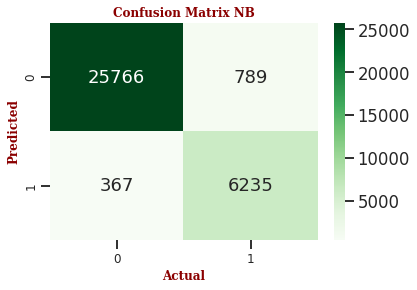

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,DT,0.967802,0.965136,0.944411,0.970288,0.957349


In [70]:
# Obtain Classification Mterics
model_name = 'DT'
DT_best_df = classification_metrics(best_DT_pred_test, best_DT_pred_train, y_train, y_test, model_name)

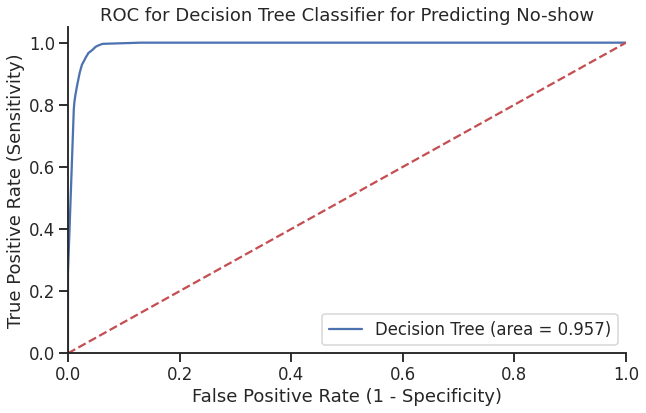

In [71]:
model_name = 'Decision Tree'
roc_curve_plot(X_test, y_test, best_DT, model_name)

### SVM Model

In [72]:
SVM_base = svm.SVC(probability=True)
SVM_base.fit(X_train, y_train)

SVC(probability=True)

In [73]:
#Predict Output
y_pred_SVM_test = SVM_base.predict(X_test)
y_pred_SVM_train = SVM_base.predict(X_train)

The accuracy score of SVM: 0.922

Training accuracy of SVM: 0.923

Test accuracy of SVM: 0.922

Sensitivity Score of SVM: 0.868

Specificity Score of SVM: 0.936

The roc_auc of SVM: 0.902

Classification report of NB model:

               precision    recall  f1-score   support

           0       0.97      0.94      0.95     26555
           1       0.77      0.87      0.82      6602

    accuracy                           0.92     33157
   macro avg       0.87      0.90      0.88     33157
weighted avg       0.93      0.92      0.92     33157

Confusion Matrix:


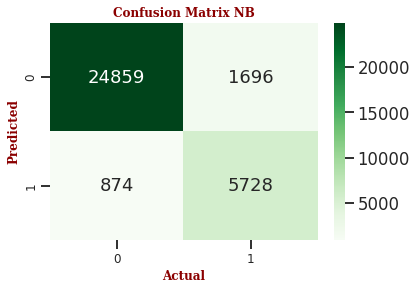

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,SVM,0.922987,0.92249,0.867616,0.936133,0.901874


In [89]:
# Obtain Classification Mterics
model_name = 'SVM'
SVM_base_df = classification_metrics(y_pred_SVM_test, y_pred_SVM_train, y_train, y_test,model_name)

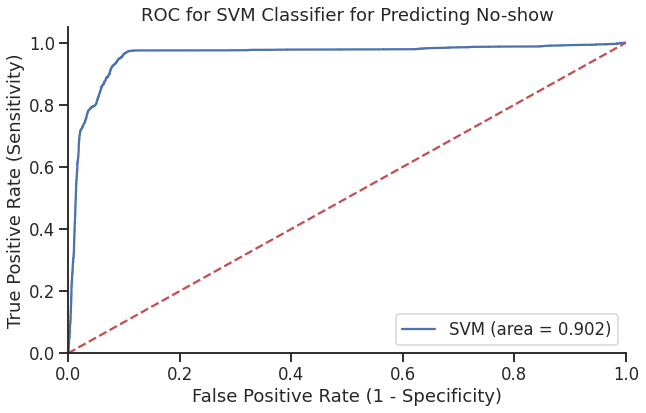

In [75]:
model_name = 'SVM'
roc_curve_plot(X_test, y_test, SVM_base, model_name)

In [145]:
# Create a function to plot roc_curve
def roc_curve_plot1(X_test, y_test, y_pred, model_name):
    # Calculating the false positive and true positive rates
    roc_auc = roc_auc_score(y_test, y_pred)
    FP_rate, TP_rate, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(10,6))
    plt.plot(FP_rate, TP_rate, label=f'{model_name} (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC for '+model_name+' Classifier for Predicting No-show')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
SVM_base1 = svm.SVC()
SVM_base1.fit(X_train, y_train)
#Predict Output
y_pred_SVM_test1 = SVM_base1.predict(X_test)
y_pred_SVM_train1 = SVM_base1.predict(X_train)

In [ ]:
# Obtain Classification Mterics
model_name = 'SVM'
SVM_base_df1 = classification_metrics(y_pred_SVM_test1, y_pred_SVM_train1, y_train, y_test,model_name)

In [ ]:
model_name = 'SVM'
roc_curve_plot(X_test, y_test, SVM_base1, model_name)

#### SVM - Grid Search Cross Validation

Creating parameters grid for:

- Penalty parameter(C)
- Kernel coefficient(gamma)
- degree of the polynomial
- Kernel type
- probability

In [ ]:

C = [0.1, 1, 10, 100, 1000]; degree = [3,4,5]; 
gamma = [1, 0.1, 0.01, 0.001, 0.0001]; probability = [True]
kernel = ['linear','poly','rbf']
grid_SVM = [{'C': C, 'kernel':kernel, 'probability':probability}]

# Create a base model
SVM_cross = svm.SVC()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#cv = 5
SVM_grid_search = GridSearchCV(SVM_cross, param_grid = grid_SVM, scoring='accuracy',cv=cv, verbose=1)

# Fit the grid search to the data
SVM_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
# The best obtained parameters from grid search:
print("The best parameters for SVM model from Grid Search:\n",SVM_grid_search.best_params_,'\n')
print("The mean accuracy of SVM model:",SVM_grid_search.best_score_)

NameError: ignored

In [ ]:
# so far, we got the best tuned parameters for SVM model.
# store it as best_SVM:
best_SVM = SVM_grid_search.best_estimator_
best_SVM

In [ ]:
# fit the SVM model to the training data
best_SVM.fit(X_train, y_train) 

#Predict Output
best_SVM_pred_test = best_SVM.predict(X_test)
best_SVM_pred_train = best_SVM.predict(X_train)

In [ ]:
# Obtain Classification Mterics
model_name = 'SVM'
SVM_best_df = classification_metrics(best_SVM_pred_test, best_SVM_pred_train, y_train, y_test,model_name)

### Models Comaprison

In [77]:
df_summary = pd.DataFrame()
models=[Best_NB_df, DT_best_df, SVM_base_df]

for df in models:
    df_summary=df_summary.append(df).reset_index().drop('index', axis=1)
df_summary

,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,NB,0.844954,0.847513,0.471372,0.941028,0.706200
1,DT,0.967802,0.965136,0.944411,0.970288,0.957349
2,SVM,0.922987,0.922490,0.867616,0.936133,0.901874


In [78]:
df_summary.sort_values('Test Accuracy', ascending=False).reset_index().drop('index', axis=1) # And sort it by Test Accuracy:

,Model,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
0,DT,0.967802,0.965136,0.944411,0.970288,0.957349
1,SVM,0.922987,0.922490,0.867616,0.936133,0.901874
2,NB,0.844954,0.847513,0.471372,0.941028,0.706200


In [79]:
df_summary.set_index('Model',inplace=True)

In [80]:
df_summary

,Training Accuracy,Test Accuracy,Sensitivity,Specificity,ROC_AUC
Model,,,,,
NB,0.844954,0.847513,0.471372,0.941028,0.706200
DT,0.967802,0.965136,0.944411,0.970288,0.957349
SVM,0.922987,0.922490,0.867616,0.936133,0.901874


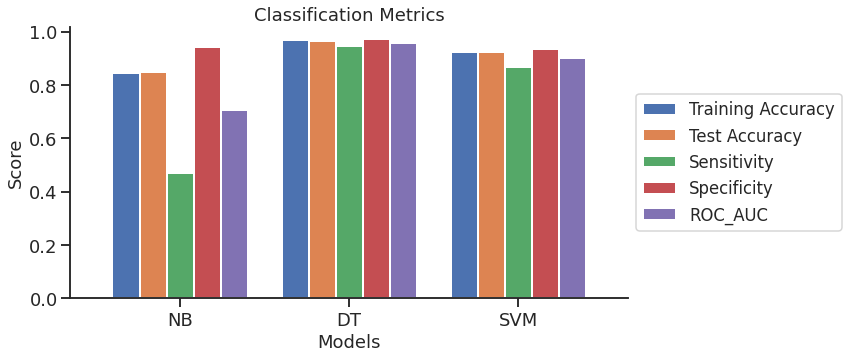

In [81]:
ax = df_summary.plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Classification Metrics",alpha=1,
                            edgecolor='white', linewidth=2).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.show(block=True)

**NB**: Naïve Bayes, **SVM**: Support Vector Machine, **DT**: Decision Tree.

> As shown in the graph above, the Decision Tree (DT) has the highest values for all metrics,so it is the best model.

> Naïve Bayes (NB) is the worst model.

**Detailed comparison is below  according to each criterion.**

>As shown, the DT is the best among the models and NB is the worst model.

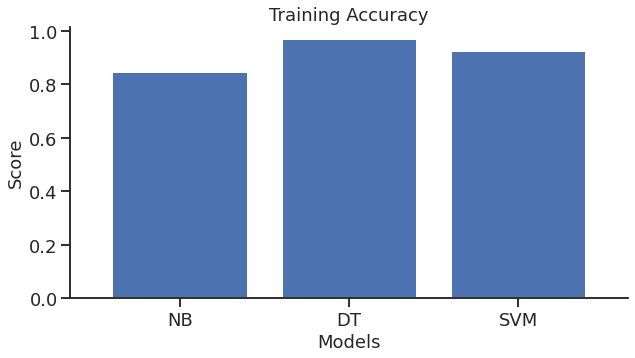

In [82]:
ax = df_summary['Training Accuracy'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Training Accuracy",alpha=1,
                            edgecolor='white', linewidth=2)
plt.show(block=True)

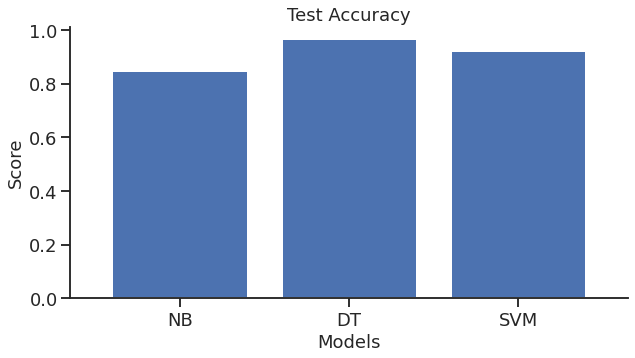

In [83]:
ax = df_summary['Test Accuracy'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Test Accuracy",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

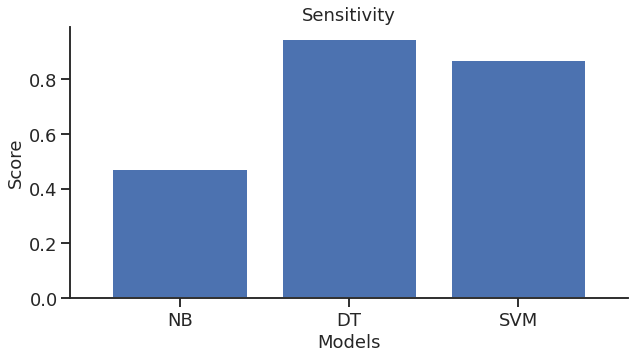

In [84]:
ax = df_summary['Sensitivity'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Sensitivity",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

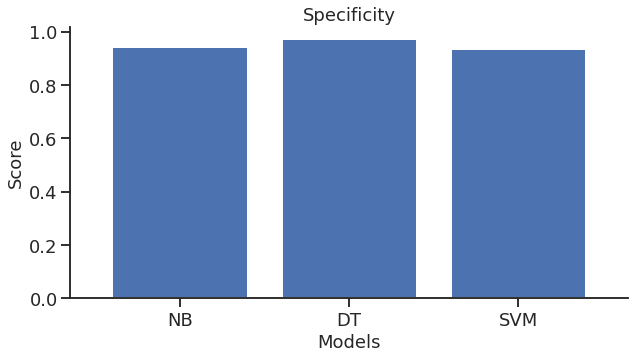

In [85]:
ax = df_summary['Specificity'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Specificity",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

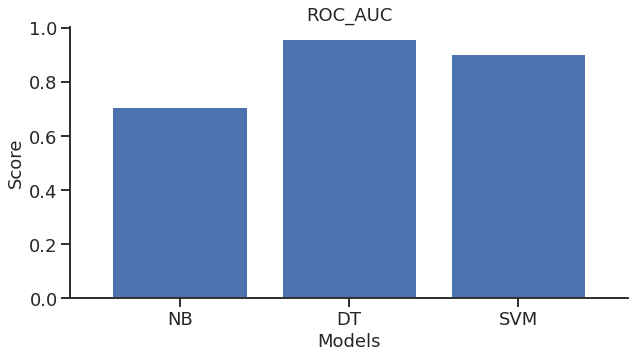

In [86]:
ax = df_summary['ROC_AUC'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="ROC_AUC",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

**Now, let's carry out a ROC analysis to compare the performance of the Naïve Bayes, SVM model with the Decision Tree model.**

In [ ]:
y_pred_SVM_test = SVM_base.predict(X_test)
y_pred_SVM_train = SVM_base.predict(X_train)

    roc_auc = roc_auc_score(y_test, SVM_base.predict(X_test))
    FP_rate, TP_rate, thresholds = roc_curve(y_test, SVM_base.predict_proba(X_test)[:,1])

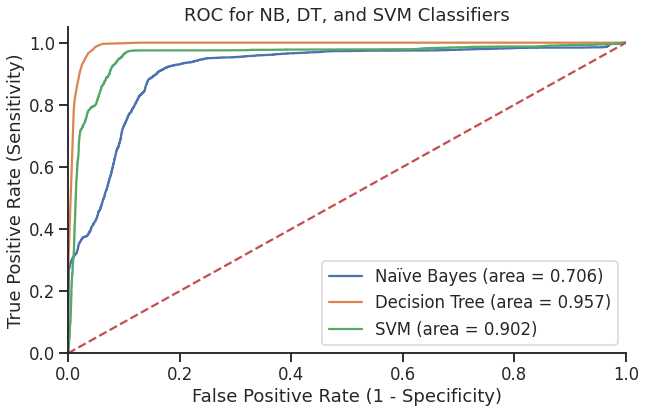

In [91]:
roc_auc_NB = roc_auc_score(y_test, best_NB.predict(X_test))
FP_rate_NB, TP_rate_NB, thresholds_NB = roc_curve(y_test, best_NB.predict_proba(X_test)[:,1])

roc_auc_DT = roc_auc_score(y_test, best_DT.predict(X_test))
FP_rate_DT, TP_rate_DT, thresholds_DT = roc_curve(y_test, best_DT.predict_proba(X_test)[:,1])

roc_auc_SVM = roc_auc_score(y_test, SVM_base.predict(X_test))
FP_rate_SVM, TP_rate_SVM, thresholds_SVM = roc_curve(y_test, SVM_base.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,6))
plt.plot(FP_rate_NB, TP_rate_NB, label=f'Naïve Bayes (area = {roc_auc_NB:.3f})')

plt.plot(FP_rate_DT, TP_rate_DT, label=f'Decision Tree (area = {roc_auc_DT:.3f})')

plt.plot(FP_rate_SVM, TP_rate_SVM, label=f'SVM (area = {roc_auc_SVM:.3f})')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for NB, DT, and SVM Classifiers')
plt.legend(loc="lower right")
plt.show()

**From ROC analysis, Decision Tree model perfomed well compared with other models.**